# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

In [1]:
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [78]:
#a)
y ,x , z, w, g = sym.symbols('y,x,z, w,g')
y = cos(x) 
z = sin(x)
w = 1/(sin(x)+cos(2*x))
print(y,z,w)

cos(x) sin(x) 1/(sin(x) + cos(2*x))


In [45]:
#b)
g = y*z
derivg = diff(g, x)
derivg

Text(0.5, 1.0, 'grafica de w(x)')

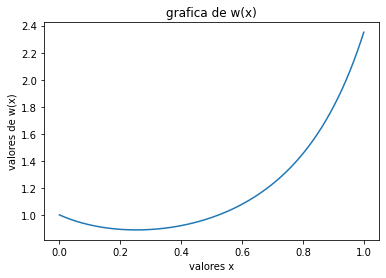

In [46]:
#c)
valX = np.linspace(0,1,1000)
valy = []
for i in valX:
    valy.append(1/(sin(i)+cos(2*i)))
valY = np.array(valy)
plt.plot(valX, valY)
plt.xlabel('valores x')
plt.ylabel('valores de w(x)')
plt.title('grafica de w(x)')

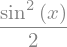

In [65]:
#d) 
integrate(g, x)

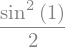

In [63]:
integrate(g, (x,0,1))


In [52]:
#e) A continuación se muestran los limites de las funciones tanto a -infinito como al infinito 
limit(y, x, oo, dir='+')

In [53]:
limit(z, x, oo, dir='+')

In [54]:
limit(g, x, oo, dir='+')

In [55]:
limit(w, x, oo, dir='+')

#f) Recordemos que asi se ve la serie de Taylor
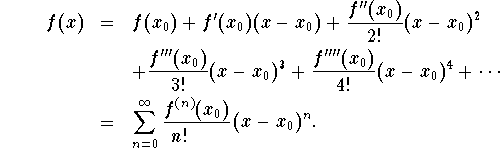


In [81]:
x_0 = symbols('x_0')

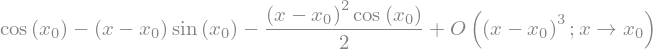

In [85]:
#para la y se ve asi
y.series(x, x_0, n=3)

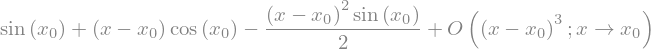

In [86]:
#asi se ve para la funcion z
z.series(x , x_0, n=3)

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [56]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [153]:
def rossler(x,y,z,dt,a,b,c):
    dxdt = x*+dt*(-y-z)
    dydt = y+dt*(x+a*y)
    dzdt = z+dt*(b+z*(x-c))
    return dxdt,dydt,dzdt

In [157]:
N=1000
x0 = 0.0  
y0 = 0.0 
z0 = 0.0
a=0.13
b=0.2
c=6.5
tau = 32
dt = 0.0001 

In [159]:
time = np.linspace(0, tau, int(32/dt))

In [149]:
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

In [117]:
x[0] = 0
y[0] = 0
z[0] = 0

In [160]:
for j in range(N-1):
    [x[j+1], y[j+1], z[j+1]] = rossler(x[j], y[j], z[j], time[j+1]-time[j], a, b, c)

In [165]:
z

array([0.00000000e+00, 2.00000625e-05, 3.99871249e-05, 5.99611957e-05,
       7.99222833e-05, 9.98703962e-05, 1.19805543e-04, 1.39727731e-04,
       1.59636971e-04, 1.79533269e-04, 1.99416634e-04, 2.19287075e-04,
       2.39144601e-04, 2.58989219e-04, 2.78820938e-04, 2.98639766e-04,
       3.18445712e-04, 3.38238784e-04, 3.58018991e-04, 3.77786340e-04,
       3.97540841e-04, 4.17282501e-04, 4.37011329e-04, 4.56727334e-04,
       4.76430522e-04, 4.96120904e-04, 5.15798487e-04, 5.35463279e-04,
       5.55115290e-04, 5.74754526e-04, 5.94380997e-04, 6.13994711e-04,
       6.33595675e-04, 6.53183899e-04, 6.72759391e-04, 6.92322158e-04,
       7.11872210e-04, 7.31409554e-04, 7.50934199e-04, 7.70446153e-04,
       7.89945424e-04, 8.09432020e-04, 8.28905950e-04, 8.48367222e-04,
       8.67815844e-04, 8.87251825e-04, 9.06675172e-04, 9.26085893e-04,
       9.45483998e-04, 9.64869494e-04, 9.84242390e-04, 1.00360269e-03,
       1.02295041e-03, 1.04228555e-03, 1.06160813e-03, 1.08091814e-03,
      

In [164]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

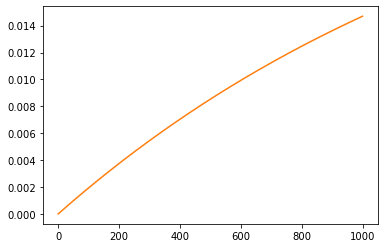

In [162]:
plt.plot(x,y,z)

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [125]:
from mpl_toolkits.mplot3d import Axes3D

ValueError: Argument Z must be 2-dimensional.

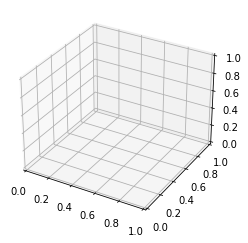

In [163]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = x
Y = x

X, Y = np.meshgrid(X, Y)
Z = z
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);